In [ ]:
from google.colab import drive
drive.mount('/drive')
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from statsmodels.stats import weightstats as stests
import scipy.stats as ss
import statistics as sc
import numpy as np
from sklearn.linear_model import LinearRegression
data=pd.read_csv('/drive/My Drive/framingham2.csv')
datadf=pd.DataFrame.sample(data,3000,random_state=9)
import statistics as stat

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
data


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,62,3,0,0,0,0,0,1,346,102.5,66.5,17.17,80,394,1
1,0,67,2,0,0,1,0,1,1,303,204.0,96.0,27.86,75,394,1
2,0,62,1,0,0,0,0,0,1,233,130.0,87.0,21.34,85,386,0
3,1,64,3,0,0,0,0,1,1,195,176.0,78.0,24.90,95,370,0
4,0,62,3,1,20,1,0,1,1,358,215.0,110.0,37.62,110,368,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,1,42,3,1,20,0,0,0,0,231,123.0,87.0,21.48,75,44,0
3652,1,59,1,1,40,0,0,1,0,188,111.0,72.0,21.48,75,44,0
3653,1,38,4,0,0,0,0,0,0,240,122.5,80.0,23.97,60,43,0
3654,1,43,2,1,43,0,0,0,0,240,126.0,79.0,21.38,88,40,0


In [ ]:
x=datadf["totChol"]
mean=sc.mean(x)
print("Mean =", mean)
median=sc.median(x)
print("Median =",median)
med_high=sc.median_high(x)
med_low=sc.median_low(x)
print("Median_high =", med_high)
print("Median_low=" , med_low)
mode=sc.mode(x)
print("Mode =", mode)
h_mean = sc.harmonic_mean(x)
print("Harmonic_Mean = " ,h_mean)
std_dev=sc.stdev(x)
print("Standard deviation= ", std_dev)
var=sc.variance(x)
print("Variance =" , var)


#b) Test at 5% significance level that the total cholesterol level is more than 240 mg/dL
#Ans:

ztest, pval = stests.ztest(x, x > 240)
print(float(pval))
if pval<0.05 :
  print("reject the null hpothesis")
else:
  print("Accept the null hpothesis")
#Soluttion:
#P_value = 0.0
#We reject the null hypothesis




Mean = 237.055
Median = 234.0
Median_high = 234
Median_low= 234
Mode = 240
Harmonic_Mean =  229.09096789942902
Standard deviation=  44.286669303821085
Variance = 1961.3090780260086
0.0
reject the null hpothesis


In [ ]:
#c) Construct 95% confidence interval of heart rate.
#Ans:
#CI Interval of heartrate
da = datadf["heartRate"]
m=sc.mean(da)
s=sc.stdev(da)
n=len(da)
dof=n-1
tc=ss.t.ppf(.975,dof)
print("t-critical value=",tc)
u=m+tc*s/np.sqrt(n);u
l=m-tc*s/np.sqrt(n);l
print("95% confidence interval for population mean is (",l,",",u,")")
ci = ss.t.interval(.95, dof, m, s/np.sqrt(n))
print("95% confidence interval of population mean is",ci)
#Solution:
#t-critical value= 1.9607553192053147
#95% confidence interval for population mean is ( 75.34910707463489 , 76.20822625869845 )

t-critical value= 1.9607553192053147
95% confidence interval for population mean is ( 75.34910707463489 , 76.20822625869845 )
95% confidence interval of population mean is (75.34910707463489, 76.20822625869845)


In [ ]:
#d) Determine the correlation coefficients among the medical conditions and comment on
#them.
#Ans:
#Correlation between male & diseases

a = datadf[['diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']]
b = datadf['male']
reg = LinearRegression().fit(a, b)
print(reg.intercept_,"\n",reg.coef_,'\n',reg.score(a, b))


0.6284859908650392 
 [ 0.02620149 -0.00075348 -0.00453414  0.00883334  0.00923747 -0.00514665
  0.00020044] 
 0.04598308656318373


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[0 1] 
 [-5.20621357] 
 [[ 0.0989124   0.00346698  0.02829717 -0.01249606  0.00139098 -0.00901461
   0.00609499]]
Logistics Regression Accuracy:  0.8555555555555555
Random Forest Accuracy:  0.8477777777777777
AdaBoost Accuracy :  0.8088888888888889
Bagging Regression Accuracy :  0.8377777777777777


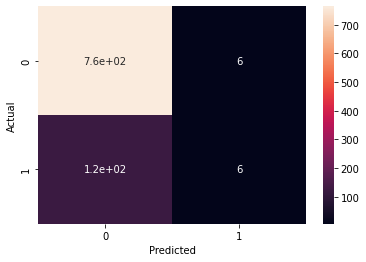

In [ ]:
#e) Using your roll as the random_state, split the data into training set (70%) and test set
#(30%). In order to predict CHD, develop the training model by the following
#methods/models: i) Logistic regression ii) Random forest iii) Bagging (any), and iv)
#Boosting (any).
#Code: #Randomly select and split data into training 70% and test 30%
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier,AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score
import seaborn as sn
x1 = datadf[['diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']]
y1 = datadf['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(x1,y1,test_size=0.30, random_state=9)
lr = LogisticRegression()
lr.fit(X_train, y_train)
model = lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(model.classes_,"\n",model.intercept_,'\n',model.coef_)
model.predict_proba(X_test)
lr_acc = accuracy_score(y_test, y_pred)
print('Logistics Regression Accuracy: ',lr_acc )
#confusion matrix
con_mat = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(con_mat,annot=True)
# Random Forest Regression
rf = RandomForestClassifier(n_estimators=3000,max_features="auto", random_state=32)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_acc = accuracy_score(y_test, y_pred_rf)
print('Random Forest Accuracy: ', y_acc)
# Boosting Regression - AdaBoosting
adb = AdaBoostClassifier(n_estimators=3000)
adb.fit(X_train, y_train)
y_pred_adb = adb.predict(X_test)
adb_acc = accuracy_score(y_test, y_pred_adb)
print("AdaBoost Accuracy : ",adb_acc)
# Bagging Regression
bgr = BaggingClassifier(n_estimators=3000)
bgr.fit(X_train, y_train)
y_pred_bgr = bgr.predict(X_test)
bgr_acc = accuracy_score(y_test, y_pred_bgr)
print("Bagging Regression Accuracy : ",bgr_acc)
